# Week 2

## Week 2 Lesson 1
## Visualisation
3 - 30 May 2017

In [5]:
import numpy as np
import pandas as pd
import urllib
import matplotlib.pyplot as plt
#!pip install seaborn
import seaborn as sns
#!pip install seaborn
import plotly
import plotly.plotly as py
import plotly.graph_objs as go 
#!pip install folium
import folium
import plotly.figure_factory as ff

plotly.tools.set_credentials_file(username='Msquirchuk', api_key='kTj4gydNrsbGuMDjMcNn')

%matplotlib inline
sns.set(color_codes=True)

### What is data visualisation?
* Data visualisation is the representation of data in a graphical way to more easily or clearly convey the patterns in data.

### Why do we visualise data?
* Visualisation helps data analysts:
 * understand the data and what patterns exist (exploratory);
 * explain the data to non-data-ists (reporting) or in a simple way.
* The greatest value of a picture is when it forces us to notice what we never expected to see. - John W Tukey, Exploratory Data Analysis, 1977.

### How can we visualise data?
* There are many data visualisation tools: the easier ones to use can do less stuff.

<img src="img/pythonvislandscape.png" width=450 align=left>
<img src="img/chart-suggestions.png" width=450 align=right>

### How do we visualise data?

#### Bar charts
* Shows numeric summaries across different categories (either horizontally or vertically).

<Container object of 8 artists>

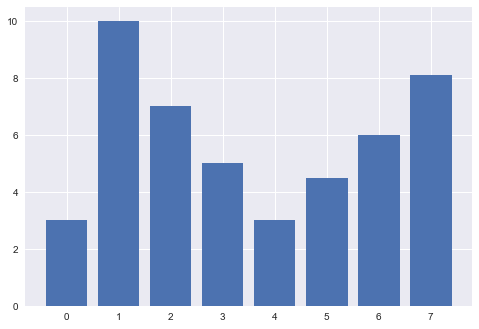

In [6]:
y = [3, 10, 7, 5, 3, 4.5, 6, 8.1]
N = len(y)
x = range(N)
plt.bar(x, y)

In [7]:
zoodata = [go.Bar(
 x=['giraffes', 'orangutans', 'monkeys'],
 y=[20, 14, 23]
 )]

py.iplot(zoodata)

In [8]:
df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/school_earnings.csv")

trace_women = Bar(x=df.School,
                  y=df.Women,
                  name='Women',
                  marker=dict(color='#ffcdd2'))

trace_men = Bar(x=df.School,
                y=df.Men,
                name='Men',
                marker=dict(color='#A2D5F2'))

trace_gap = Bar(x=df.School,
                y=df.gap,
                name='Gap',
                marker=dict(color='#59606D'))

data = [trace_women, trace_men, trace_gap]
layout = Layout(title="Average Earnings for Graduates",
                xaxis=dict(title='School'),
                yaxis=dict(title='Salary (in thousands)'))

fig = Figure(data=data, layout=layout)

py.iplot(fig, filename='styled_bar')

NameError: name 'Bar' is not defined

#### Histograms
* Shows the distribution of data over a continuous interval
* Allows us to see the shape of our data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11ec69048>]], dtype=object)

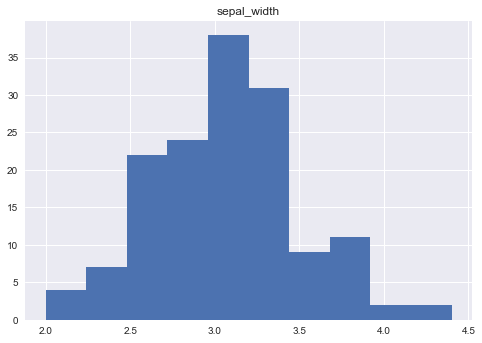

In [9]:
raw_data=urllib.request.urlopen("http://goo.gl/HppjFh")
dataset = pd.read_csv(raw_data, delimiter=",", names=('sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'))
dataset[['sepal_width']].hist()

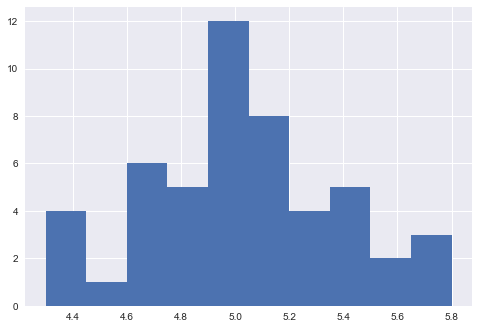

In [10]:
dataset.loc[dataset['species'] == 'Iris-setosa','sepal_length'].hist()

In [11]:
x = np.random.randn(500)
data = [go.Histogram(x=x)]
py.iplot(data, filename='basic histogram') 

#### Scatterplots
* Shows values between two variables, one on each axis.
* Used to see a relationship between variables

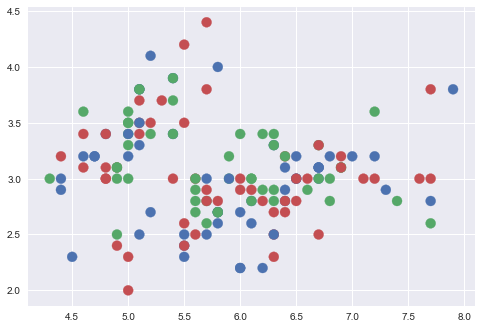

In [12]:
plt.scatter(dataset['sepal_length'],dataset['sepal_width'],100,'rgb')

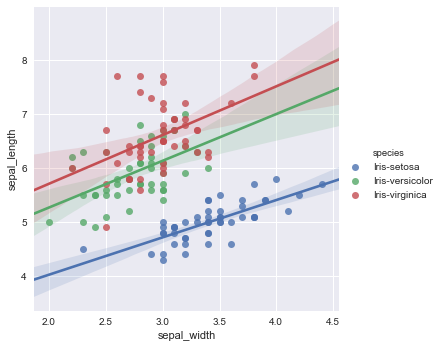

In [13]:
sns.lmplot(x='sepal_width', y="sepal_length", hue="species", data=dataset, fit_reg=True)

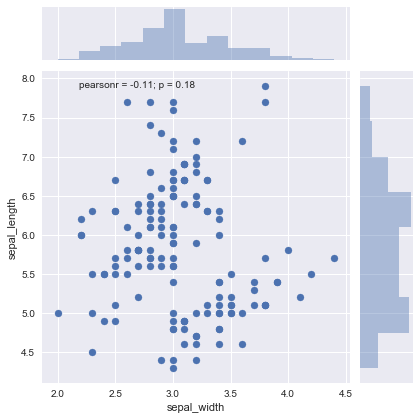

In [14]:
sns.jointplot(x="sepal_width", y="sepal_length", data=dataset)

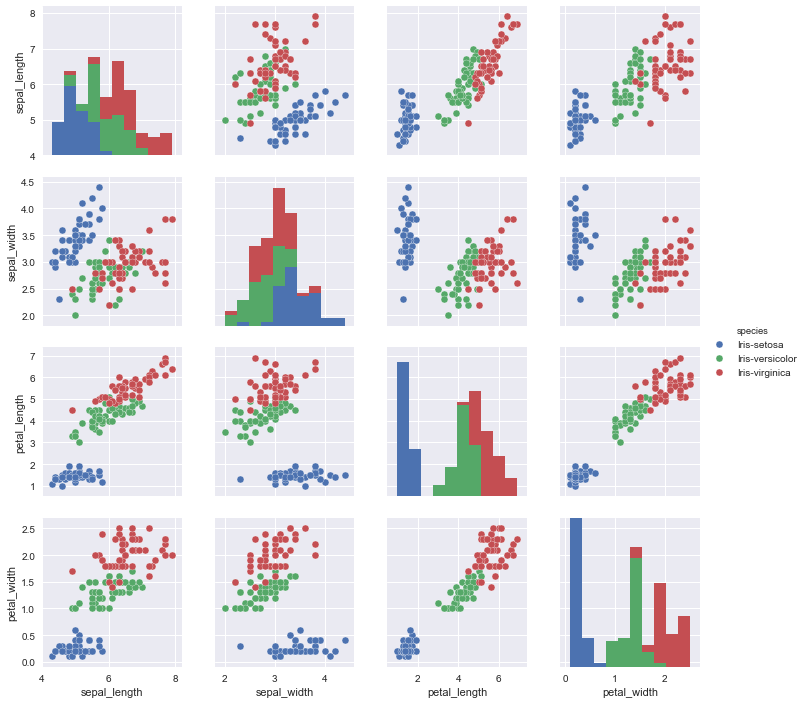

In [15]:
sns.pairplot(dataset, hue='species');

In [16]:
N = 1000
random_x = np.random.randn(N)
random_y = np.random.randn(N)
trace = go.Scatter(
 x = random_x,
 y = random_y,
 mode = 'markers'
)
data = [trace]
py.iplot(data, filename='basic-scatter')

#### Box and whisker plots
* Displays numerical distribution summaries by groups through quartiles
* Can compare different distributions 

{'boxes': [<matplotlib.lines.Line2D at 0x1209ee1d0>],
 'caps': [<matplotlib.lines.Line2D at 0x1209de630>,
 'fliers': [<matplotlib.lines.Line2D at 0x1209f8978>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1209dedd8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1209ee940>,
  <matplotlib.lines.Line2D at 0x1209eef98>]}

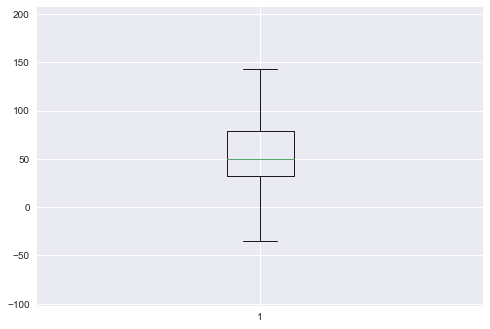

In [17]:
spread = np.random.rand(50) * 100
center = np.ones(25) * 50
flier_high = np.random.rand(10) * 100 + 100
flier_low = np.random.rand(10) * -100
data = np.concatenate((spread, center, flier_high, flier_low), 0)

plt.boxplot(data)

{'boxes': [<matplotlib.lines.Line2D at 0x120a78a90>,
 'caps': [<matplotlib.lines.Line2D at 0x120a82eb8>,
 'fliers': [<matplotlib.lines.Line2D at 0x120a8fe80>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x120a87f98>,
 'whiskers': [<matplotlib.lines.Line2D at 0x120a78c88>,
  <matplotlib.lines.Line2D at 0x120ab6c18>]}

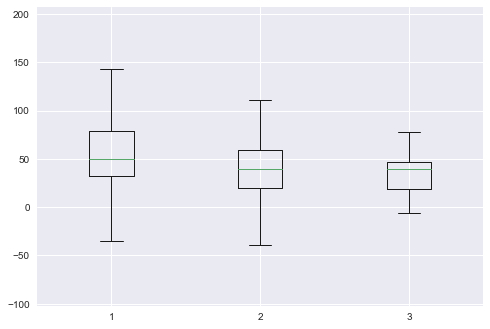

In [18]:
spread = np.random.rand(50) * 100
center = np.ones(25) * 40
flier_high = np.random.rand(10) * 100 + 100
flier_low = np.random.rand(10) * -100
d2 = np.concatenate((spread, center, flier_high, flier_low), 0)
data.shape = (-1, 1)
d2.shape = (-1, 1)
# data = concatenate( (data, d2), 1 )
# Making a 2-D array only works if all the columns are the
# same length.  If they are not, then use a list instead.
# This is actually more efficient because boxplot converts
# a 2-D array into a list of vectors internally anyway.
data = [data, d2, d2[::2, 0]]
# multiple box plots on one figure
plt.figure()
plt.boxplot(data)

In [19]:
y0 = np.random.randn(50)-1
y1 = np.random.randn(50)+1
trace0 = go.Box(
 y=y0
)
trace1 = go.Box(
 y=y1
)
data = [trace0, trace1]
py.iplot(data) 

#### Density plots
* Similar to a histogram but smooths out the distribution with a continuous line
* Not affected by bin choices 

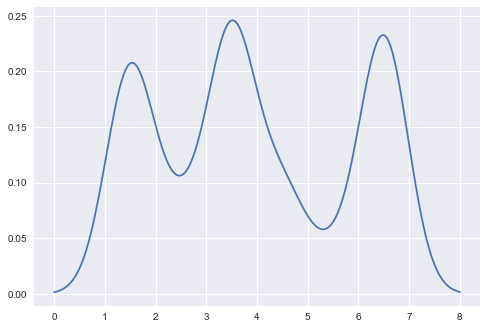

In [20]:
from scipy.stats import gaussian_kde

data = [1.5]*7 + [2.5]*2 + [3.5]*8 + [4.5]*3 + [5.5]*1 + [6.5]*8

density = gaussian_kde(data)
xs = np.linspace(0,8,200)
density.covariance_factor = lambda : .25
density._compute_covariance()
plt.plot(xs,density(xs))
plt.show()

#### Heat maps
* Colour coding applied to tabular data.
* Provides a generalised view of the data by each cell 

In [ ]:
x = np.random.randn(8873)
y = np.random.randn(8873)

heatmap, xedges, yedges = np.histogram2d(x, y, bins=50)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower')
plt.show()

In [ ]:
trace = go.Heatmap(z=[[1, 20, 30],
 [20, 1, 60],
 [30, 60, 1]])
data=[trace]
py.iplot(data, filename='basic-heatmap') 

In [ ]:
x = np.random.randn(2000)
y = np.random.randn(2000)
plotly.offline.iplot([Histogram2dContour(x=x, y=y, contours=Contours(coloring='heatmap')),
       Scatter(x=x, y=y, mode='markers', marker=Marker(color='white', size=3, opacity=0.3))], show_link=False)

#### Line graphs
* Used to display a numeric value over a continuous value or time
* Used to observe trends and changes over time

In [ ]:
y = range(3)
x = [3,4,5]
plt.plot(x,y)

In [ ]:
N = 500
random_x = np.linspace(0, 1, N)
random_y = np.random.randn(N)
trace = go.Scatter(
 x = random_x,
 y = random_y
)
data = [trace]
py.iplot(data, filename='basic-line') 

#### Parallel coordinates
* Plot multiple numeric variables across each observation
* Each axis is scaled and each line through the graph is an observation

In [ ]:
data = [
    go.Parcoords(
        line = dict(color = 'blue'),
        dimensions = list([
            dict(range = [1,5],
                 constraintrange = [1,2],
                 label = 'A', values = [1,4]),
            dict(range = [1.5,5],
                 tickvals = [1.5,3,4.5],
                 label = 'B', values = [3,1.5]),
            dict(range = [1,5],
                 tickvals = [1,2,4,5],
                 label = 'C', values = [2,4],
                 ticktext = ['text 1', 'text 2', 'text 3', 'text 4']),
            dict(range = [1,5],
                 label = 'D', values = [4,2])
        ])
    )
]

py.iplot(data, filename = 'parcoord-dimensions')

In [5]:
from pandas.tools.plotting import parallel_coordinates
parallel_coordinates (dataset, 'species')

NameError: name 'dataset' is not defined

#### Maps
* Allows us to plot points geographically
* We can overlay information on a map, usually loaded as a collection of ‘tiles’. 

In [ ]:
map_object = folium.Map(location=[-33.8, 151.2], zoom_start=2,
tiles="Stamen toner")
marker = folium.features.Marker([-33.869824, 151.206423],popup="General Assembly!")
map_object.add_child(marker) 

In [ ]:
df_airports = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_february_us_airport_traffic.csv')
df_airports.head()

df_flight_paths = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_february_aa_flight_paths.csv')
df_flight_paths.head()

airports = [ dict(
        type = 'scattergeo',
        locationmode = 'USA-states',
        lon = df_airports['long'],
        lat = df_airports['lat'],
        hoverinfo = 'text',
        text = df_airports['airport'],
        mode = 'markers',
        marker = dict(
            size=2,
            color='rgb(255, 0, 0)',
            line = dict(
                width=3,
                color='rgba(68, 68, 68, 0)'
            )
        ))]

flight_paths = []
for i in range( len( df_flight_paths ) ):
    flight_paths.append(
        dict(
            type = 'scattergeo',
            locationmode = 'USA-states',
            lon = [ df_flight_paths['start_lon'][i], df_flight_paths['end_lon'][i] ],
            lat = [ df_flight_paths['start_lat'][i], df_flight_paths['end_lat'][i] ],
            mode = 'lines',
            line = dict(
                width = 1,
                color = 'red',
            ),
            opacity = float(df_flight_paths['cnt'][i])/float(df_flight_paths['cnt'].max()),
        )
    )

layout = dict(
        title = 'Feb. 2011 American Airline flight paths<br>(Hover for airport names)',
        showlegend = False,
        height = 800,
        geo = dict(
            scope='north america',
            projection=dict( type='azimuthal equal area' ),
            showland = True,
            landcolor = 'rgb(243, 243, 243)',
            countrycolor = 'rgb(204, 204, 204)',
        ),
    )

fig = dict( data=flight_paths + airports, layout=layout )

py.iplot(fig)

### Charts to avoid
* Stacked area maps
* Word clouds
* Pie charts

### Additional readings
* Edward Tuſte, The Visual Display of Quantitative Information
* Leland Wilkinson, The Grammar of Graphics
* Scott Murray, Interactive Data Visualisation for the Web (free online)
* flowingdata.com
* New York Times (Upshot)

---

## Week 2 Lesson 2
## Linear Regression
4 - 1 June 2017

### Supervised vs unsupervised learning
* Supervised learning is where there is a target output - we want something to come out of our model.
 * Regression: If the target variable is numeric then we have a regression problem.
 * cf. Classification: If the target variable is a category (for example trying to predict a type of flower) the we have a classification problem - we are trying to classify what group that y belongs to.
 * Features: Data values that provide information to help guess the target, aka predictor or independent variables.
* Unsupervised learning is where there is no output, but we want to observe the model of the data, e.g. for exploration. We want to find some underlying structure or patterns in the data but in this case we don’t have any labeled data.

### Linear Regression 
* We want to model a linear relationship (think straight line) between our target variable y and our input variable x:
y=Xβ+ϵ, where:
 * y = target variable
 * X = input variable
 * β = coefficients
 * ϵ = error term 
* It is the explanation of a continuous variable given a series of independent variables.
* The simplest version is just a line of best fit: y = mx + b... It explains the relationship between x and y using the starting point b and the power in explanation m.
* Linear regression is a simple approach to supervised learning. It assumes that the dependence of Y on X1, X2 ,… Xp is linear. True regression functions are never linear.
* Linear relationship in the parameters, β, we can transform the actual values of the inputs if we want.
* Variance of the error term, ϵ, is constant. This means there is no systematic pattern in the values of X and the variance of ϵ. The mean of ϵ = 0. ϵ has a normal distribution. If it does not, it could introduce bias. 
* There will be no perfect (or near perfect) co-linearity between any of the input variables. Otherwise the fitting procedure will break. 


#### How it works
_Ordinary Least Squares_
<img src="img/linear-regression-rss.png" align=right width=300>
* Creating a linear regression model is really about minimising the _Residual Sum of Squares_ or RSE. This is the Sum of the squared difference between our observed value and the value from the model. That is: <img src="img/RSS-equation.png" width=400>
* Wording the function as: <img src="img/linear-equation.png">
* Wording RSS as a function of e (error): <img src="rssaserror.png">
* Error is just the difference between yi and y as it is observed. So, expanding: <img src="img/rssaserror2.png">
* Resolving this equation, it means:
<img src="img/OLS.png">



#### R-Squared
* R-squared is the central metric introduced for linear regression. The closer to 1 the R-squared, the better the fit. 
* R-squared measures explain variance, but it doesn't tell the magnitude or scale of error.

<img src="img/R2-equations.png" width=500 align=left>

### Multiple linear regression
* Multi-dimensions allows for complex models even with linear components.

<img src="img/multiple-linear-regression2.png" align=right width=200 >

* The ideal scenario is when the predictors are uncorrelated:
 * Interpretations can be made such as “a unit change in Xj is associated with a βj change in Y , while all the other variables stay fixed”.
 * Correlations amongst predictors cause problems when Xj changes, everything else changes.

 <img src="img/multiple-linear-regression.png" align=left width=400>


#### Make sure you visualise your data and check the actual model fit !!! 
See [Anscombe's Quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet) for why!
<img src="img/anscombes-quartet.png" width=400 align=right>

In [ ]:
import pandas as pd
import statsmodels.formula.api as smf

house_data = pd.read_csv("../data/chicagohouseprices2.csv", index_col=0)
house_data.head(1)
#replace missing data
house_data.fillna(value='NA', inplace=True) 
#look at the correlations between the data
pd.scatter_matrix(house_data, figsize=(15,15))

In [ ]:
#create the linear model
lm1 = smf.ols(formula='Price ~ Bath + HouseSizeSqft', data=house_data).fit()
#print the coefficients
lm1.params
#print the regression results
lm1.summary()

In [ ]:
lm2 = smf.ols(formula='Price ~ Bath + CrimeIndex + MinutesToLoop + MilesToLake + Age + LotSizeSqft + HouseSizeSqft + SchoolIndex + EstimatedPrice', data=house_data).fit()
lm2.params
lm2.summary()